# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

ss = StandardScaler()

In [4]:
# Transforming our data
X_tr_sc = ss.fit_transform(X_train)
X_te_sc = ss.transform(X_test)

In [5]:
X_tr_sc.shape

(426, 30)

## Constructing a Neural Network in Keras

In [6]:
# Importing model and layer types
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [7]:
print(tf.__version__)

1.14.0


In [8]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# !python3 -c 'import tensorflow as tf; print(tf.__version__)'

In [9]:
# Constructing and compiling our model
model = Sequential()

inputs = X_train.shape[1]
model.add(Dense(inputs, input_dim=inputs, activation='relu'))
model.add(Dense(1))

adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

In [10]:
# Fitting our model

model.fit(X_tr_sc, y_train, validation_data=(X_te_sc, y_test),
          epochs=20)



Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 0s 715us/step - loss: 1.7252 - val_loss: 1.0378
Epoch 2/20
426/426 [==============================] - 0s 78us/step - loss: 0.7718 - val_loss: 0.4688
Epoch 3/20
426/426 [==============================] - 0s 117us/step - loss: 0.3801 - val_loss: 0.2568
Epoch 4/20
426/426 [==============================] - 0s 109us/step - loss: 0.2463 - val_loss: 0.1955
Epoch 5/20
426/426 [==============================] - 0s 124us/step - loss: 0.2085 - val_loss: 0.1730
Epoch 6/20
426/426 [==============================] - 0s 181us/step - loss: 0.1807 - val_loss: 0.1606
Epoch 7/20
426/426 [==============================] - 0s 101us/step - loss: 0.1603 - val_loss: 0.1510
Epoch 8/20
426/426 [==============================] - 0s 109us/step - loss: 0.1437 - val_loss: 0.1414
Epoch 9/20
426/426 [==============================] - 0s 126us/step - loss: 0.1318 - val_loss: 0.1321
Epoch 10/20
426/426 [==============

In [22]:
# Storing that fit as a history log

history_log = model.fit(X_tr_sc, y_train, 
                       validation_data=(X_te_sc, y_test),
                       epochs=100, verbose=0, batch_size=200)

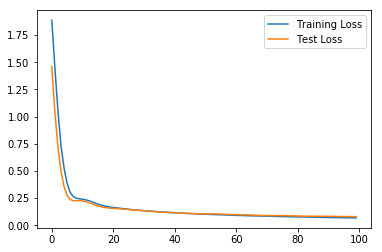

In [23]:
# Plotting our losses
train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend();

## Tensorflow

In [31]:
import tensorflow as tf

In [25]:
# Non-dynamic programming!
var1 = 6
var2 = var1 * 3

In [26]:
var2

18

In [29]:
var1= 8

In [30]:
var2

18

### Tensorflow as a graph constructor

In [32]:
# tf.placeholder()!
slot_1 = tf.placeholder(tf.int64, shape=(3, 2))
slot_2 = tf.placeholder(tf.int64, shape=(2, 3))

ans = tf.matmul(slot_1, slot_2)

In [41]:
# Starting a session

with tf.Session() as sess:
    result = sess.run(ans, feed_dict={slot_1: [[3, 3], [2, 2], [1, 1]],
                                     slot_2: [[1, 2, 3], [1, 1, 1]]})

In [ ]:
# Printing the output



### Neural Network

In [44]:
X_tr_sc.shape

(426, 30)

In [49]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [51]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_tr_sc, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_te_sc})

classes = (pred > 0.5).astype(int)

metrics.mean_squared_error(y_test.reshape(-1, 1), classes)

0.02097902097902098

In [57]:
# model.predict(X_tr_sc)
X_te_sc

array([[-0.46809882, -0.14171322, -0.44468042, ..., -0.17331092,
         0.22117163,  0.23655985],
       [ 1.36445686,  0.49958757,  1.30643802, ...,  1.0294302 ,
        -0.53161875, -0.99405722],
       [ 0.37878549,  0.06653205,  0.40430925, ...,  0.6020997 ,
        -0.06661217, -0.17972015],
       ...,
       [-0.87313045, -0.5605702 , -0.86361419, ..., -0.59582424,
         0.19515727, -0.25830652],
       [ 1.6108747 ,  0.69836715,  1.57007383, ...,  1.96023373,
        -0.17879907, -0.40978461],
       [-1.09405679, -1.65149148, -1.07658249, ..., -0.71003802,
         0.09597755, -0.34885169]])

In [11]:
np.hstack([model.predict(X_te_sc), y_test.reshape(143, 1)])[61:80]

array([[-0.28762722,  0.        ],
       [ 0.19714417,  0.        ],
       [ 0.74797499,  1.        ],
       [ 1.18707931,  1.        ],
       [ 0.30986965,  1.        ],
       [-0.21549241,  0.        ],
       [-0.27160645,  0.        ],
       [ 0.79051197,  1.        ],
       [ 0.59843075,  1.        ],
       [ 0.07092888,  0.        ],
       [ 0.20814313,  0.        ],
       [ 1.04575241,  1.        ],
       [ 0.34383452,  0.        ],
       [ 0.74622995,  1.        ],
       [ 0.93220979,  1.        ],
       [ 1.04106748,  1.        ],
       [ 0.51545262,  0.        ],
       [ 1.06231022,  1.        ],
       [ 0.74236226,  1.        ]])